## **1. Introduction**

### **Exploratory Data Analysis (EDA): Air Pollution, Alcohol, Smoking & Risk of Lung Cancer**

**Objective:**
The goal of this notebook is to perform Exploratory Data Analysis (EDA) on the "Cancer Patient Data Sets" to understand the underlying structure of the data, identify missing values or outliers, and analyze relationships between various risk factors (like smoking, air pollution, alcohol) and the likelihood of lung cancer.

**Dataset Context:**
Lung cancer is a leading cause of cancer death globally. While smoking is a primary driver, factors like air pollution, genetics, and occupational hazards also play significant roles. This dataset contains records of patients with various attributes related to health and environmental exposure.


## **2. Import Libraries**

We will use `pandas` for data manipulation, `numpy` for numerical operations, and `matplotlib` / `seaborn` for data visualization.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration for visualisations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')


## **3. Data Loading and Overview**

Let's load the dataset and take a first look at the structure, data types, and summary statistics.


In [2]:
try:
    df = pd.read_csv('Dataset/cancer patient data sets.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")

Dataset loaded successfully.


In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### **3.1 Dataset Structure**
We need to check the data types and if there are any null values.


In [4]:
# Check info about columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

### **3.2 Statistical Summary**
This gives us the count, mean, standard deviation, min, and max values for numerical columns.


In [5]:
# Statistical summary
df.describe().T


,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


## **4. Data Cleaning & Preprocessing**

Before visualization, we must ensure the data is clean.
1.  **Drop ID columns:** Usually, datasets have an index or ID column that isn't useful for prediction.
2.  **Fix Column Names:** There are typos in the original dataset (e.g., "OccuPational Hazards", "chronic Lung Disease").


In [6]:
# 1. Drop the 'index' column if it exists (common in this dataset)
if 'index' in df.columns:
    df = df.drop(columns=['index','Patient Id'])


In [7]:
# 2. Rename columns to be more standard and readable
df.columns = df.columns.str.replace(' ', '_') # Replace spaces with underscores
df.rename(columns={
    'OccuPational_Hazards': 'Occupational_Hazards',
    'chronic_Lung_Disease': 'Chronic_Lung_Disease',
}, inplace=True)


In [8]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 848


In [9]:
print("\nUpdated Column Names:")
print(df.columns.tolist())



Updated Column Names:
['Age', 'Gender', 'Air_Pollution', 'Alcohol_use', 'Dust_Allergy', 'Occupational_Hazards', 'Genetic_Risk', 'Chronic_Lung_Disease', 'Balanced_Diet', 'Obesity', 'Smoking', 'Passive_Smoker', 'Chest_Pain', 'Coughing_of_Blood', 'Fatigue', 'Weight_Loss', 'Shortness_of_Breath', 'Wheezing', 'Swallowing_Difficulty', 'Clubbing_of_Finger_Nails', 'Frequent_Cold', 'Dry_Cough', 'Snoring', 'Level']


## **5. Univariate Analysis**

We will look at individual variables to understand their distributions.

### **5.1 Target Variable Analysis (`Level`)**
The column `Level` represents the risk of lung cancer (Low, Medium, High). This is our target variable.


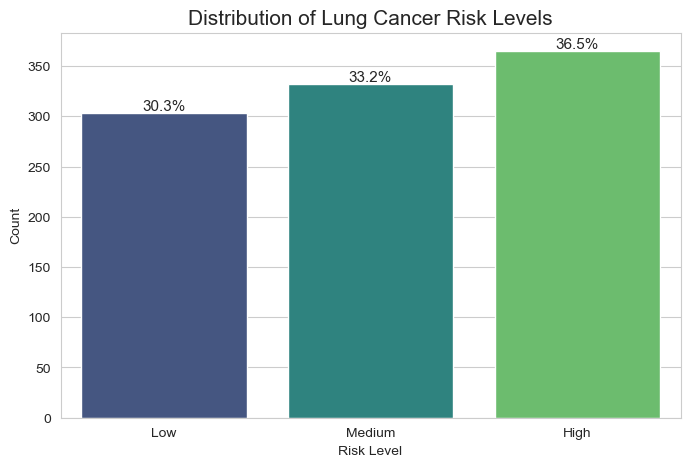

In [10]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    x='Level',
    data=df,
    palette='viridis',
    order=['Low', 'Medium', 'High']
)

plt.title('Distribution of Lung Cancer Risk Levels', fontsize=15)
plt.xlabel('Risk Level')
plt.ylabel('Count')

# Calculate percentages
total = len(df)

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(
        f'{percentage:.1f}%',
        (p.get_x() + p.get_width() / 2., count),
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.show()


**Observation:**
> The dataset is relatively balanced, though not perfectly.
> *   **High Risk:** Accounts for the largest portion (**36.5%**).
> *   **Medium Risk:** Accounts for **33.2%**.
> *   **Low Risk:** Accounts for **30.3%**.
>
> Since the classes are reasonably balanced (no class is extremely minor), we likely do not need to apply heavy resampling techniques (like SMOTE) for the subsequent machine learning tasks.



### **5.2 Numerical Distribution: Age**
How is the age of the patients distributed?


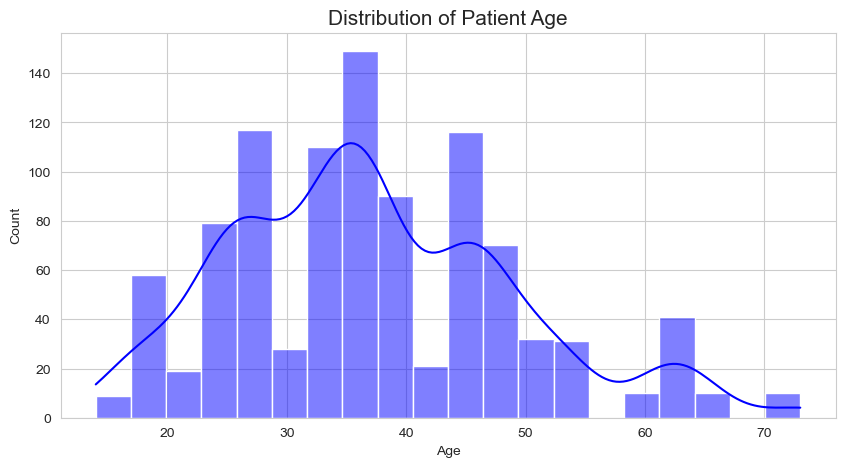

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Patient Age', fontsize=15)
plt.xlabel('Age')
plt.show()



**Observation:**
> The age distribution appears somewhat **bimodal**, with peaks around the ages of 35 and 45.
> *   The age ranges from 14 to 73.




### **5.3 Gender Distribution**
Checking the gender balance in the dataset.


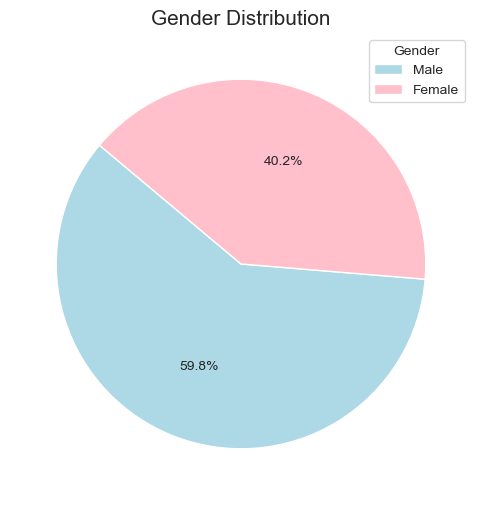

In [12]:
plt.figure(figsize=(6, 6))

gender_counts = df['Gender'].value_counts()

plt.pie(
    gender_counts,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue', 'pink']
)

# Create custom legend labels
legend_labels = ['Male', 'Female']

plt.legend(
    legend_labels,
    title='Gender',
    loc='best'
)

plt.title('Gender Distribution', fontsize=15)
plt.show()


**Observation:**
> *   **Males (coded as 1):** Represent **~59.8%** of the dataset.
> *   **Females (coded as 2):** Represent **~40.2%** of the dataset.
>
> There is a higher representation of male patients, which aligns with global statistics showing higher lung cancer rates in men, largely due to historical smoking patterns.


## **6. Bivariate Analysis**

Here we analyze relationships between features and the target variable.

### **6.1 Correlation Matrix**
To perform a correlation analysis, we need to convert the categorical target `Level` into numbers (Low=1, Medium=2, High=3).


In [13]:
# Create a copy for correlation analysis
df_corr = df.copy()

# Map the ordinal target variable to numbers
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_corr['Level_Encoded'] = df_corr['Level'].map(level_mapping)

# Drop the original 'Level' text column and 'Patient Id' (if strictly numeric correlation is needed)
numerical_df = df_corr.select_dtypes(include=[np.number])


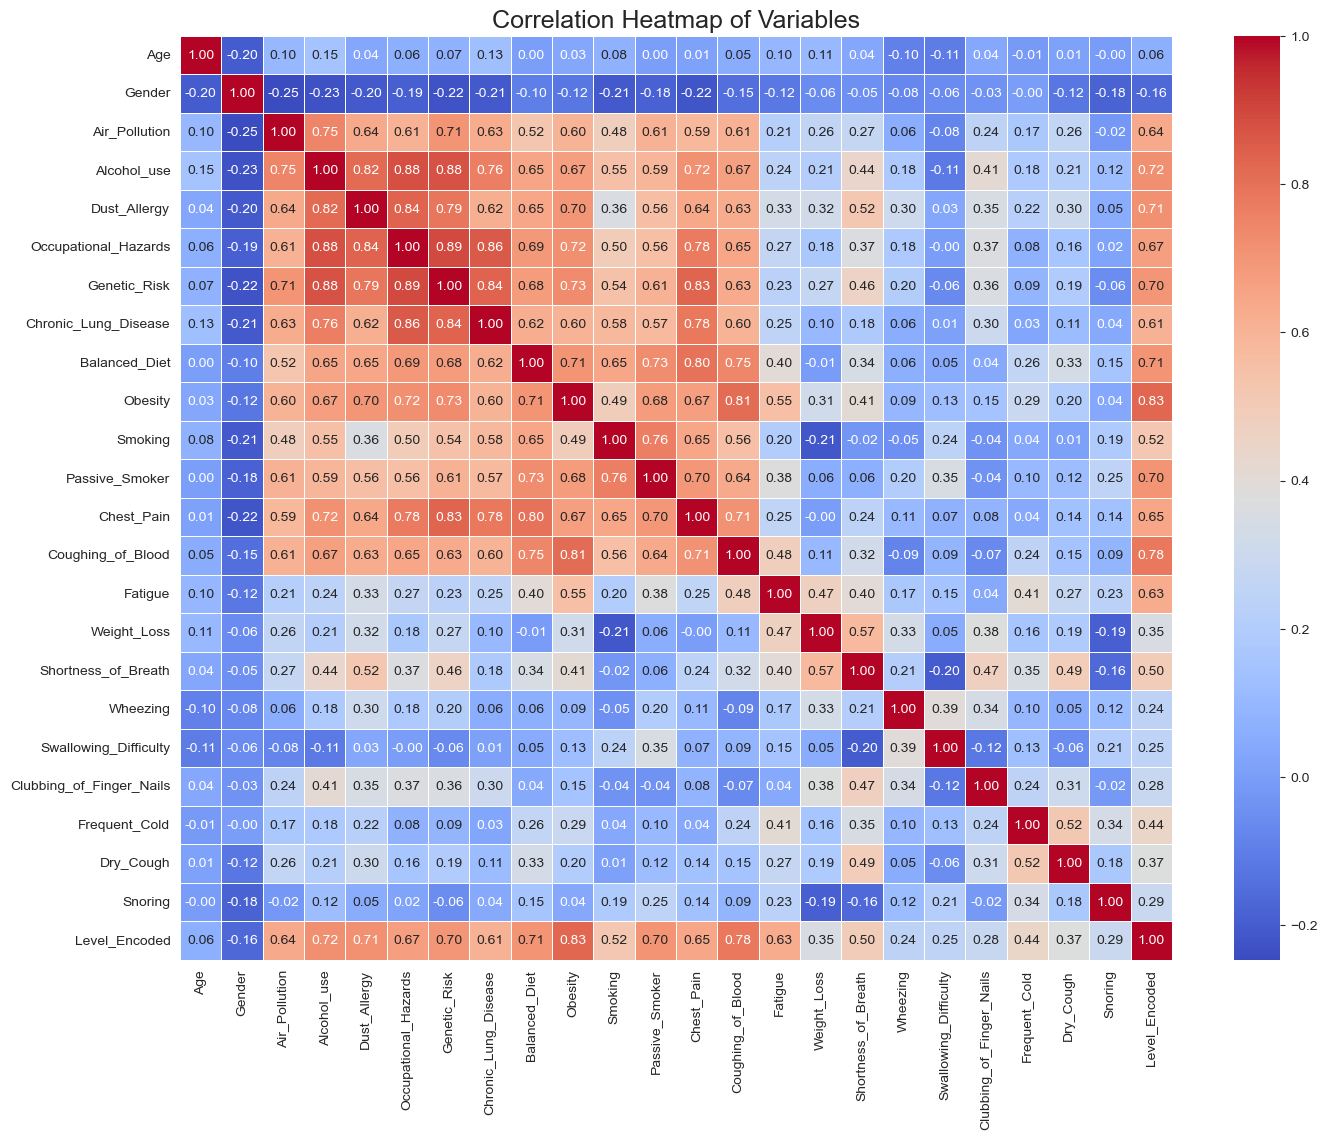

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,Occupational_Hazards,Genetic_Risk,Chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level_Encoded
Age,1.00,-0.20,0.10,0.15,0.04,0.06,0.07,0.13,0.00,0.03,...,0.10,0.11,0.04,-0.10,-0.11,0.04,-0.01,0.01,-0.00,0.06
Gender,-0.20,1.00,-0.25,-0.23,-0.20,-0.19,-0.22,-0.21,-0.10,-0.12,...,-0.12,-0.06,-0.05,-0.08,-0.06,-0.03,-0.00,-0.12,-0.18,-0.16
Air_Pollution,0.10,-0.25,1.00,0.75,0.64,0.61,0.71,0.63,0.52,0.60,...,0.21,0.26,0.27,0.06,-0.08,0.24,0.17,0.26,-0.02,0.64
Alcohol_use,0.15,-0.23,0.75,1.00,0.82,0.88,0.88,0.76,0.65,0.67,...,0.24,0.21,0.44,0.18,-0.11,0.41,0.18,0.21,0.12,0.72
Dust_Allergy,0.04,-0.20,0.64,0.82,1.00,0.84,0.79,0.62,0.65,0.70,...,0.33,0.32,0.52,0.30,0.03,0.35,0.22,0.30,0.05,0.71
Occupational_Hazards,0.06,-0.19,0.61,0.88,0.84,1.00,0.89,0.86,0.69,0.72,...,0.27,0.18,0.37,0.18,-0.00,0.37,0.08,0.16,0.02,0.67
Genetic_Risk,0.07,-0.22,0.71,0.88,0.79,0.89,1.00,0.84,0.68,0.73,...,0.23,0.27,0.46,0.20,-0.06,0.36,0.09,0.19,-0.06,0.70
Chronic_Lung_Disease,0.13,-0.21,0.63,0.76,0.62,0.86,0.84,1.00,0.62,0.60,...,0.25,0.10,0.18,0.06,0.01,0.30,0.03,0.11,0.04,0.61
Balanced_Diet,0.00,-0.10,0.52,0.65,0.65,0.69,0.68,0.62,1.00,0.71,...,0.40,-0.01,0.34,0.06,0.05,0.04,0.26,0.33,0.15,0.71
Obesity,0.03,-0.12,0.60,0.67,0.70,0.72,0.73,0.60,0.71,1.00,...,0.55,0.31,0.41,0.09,0.13,0.15,0.29,0.20,0.04,0.83


In [14]:
corr_matrix = numerical_df.corr()

# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Variables', fontsize=18)
plt.show()

# Table
corr_matrix.round(2)


### **Observation:**

#### **1. Correlation with Target (`Level_Encoded`)**
The heatmap reveals very strong drivers for Lung Cancer Risk. The features with the highest correlation to the target are:
*   **Obesity (0.83):** The strongest predictor in this dataset.
*   **Coughing of Blood (0.78):** A severe symptom strongly linked to high risk.
*   **Alcohol Use (0.72):** A major behavioral risk factor.
*   **Genetic Risk (0.70) & Occupational Hazards (0.67):** Significant environmental/biological factors.

*Note: Surprisingly, **Age (0.06)** has almost zero correlation with cancer risk in this specific dataset, which contradicts real-world medical data where age is a primary risk factor. This suggests the dataset may be synthetic.*

#### **2. Multicollinearity Analysis (Feature vs. Feature)**
There is **significant multicollinearity** present in the dataset (features highly correlated with each other). This is crucial to note for model selection (especially for Linear/Logistic Regression).
*   **Occupational Hazards & Genetic Risk (0.89):** These two are nearly identical.
*   **Alcohol Use & Occupational Hazards (0.88):** Extremely high correlation.
*   **Alcohol Use & Genetic Risk (0.88):** Also extremely high.
*   **Dust Allergy & Alcohol Use (0.82):** High correlation.

**Implication:**
Variables like `Alcohol_use`, `Occupational_Hazards`, and `Genetic_Risk` are providing redundant information. If we were using a Linear Regression model, we would need to drop two of these three to prevent coefficient instability. However, for Tree-based models (like Random Forest or XGBoost), this redundancy is handled better.

However, note that the multicollinearity relationships **do not** make sense in a real-world medical context. It is impossible for alcohol consumption to determine a patient's genetick risk score, and Dust Allergy & Alcohol Use are not medically related.

### **6.2 Impact of Key Risk Factors on Cancer Level**
Let's visualize how Alcohol, Smoking, and Air Pollution affect the Risk Level.


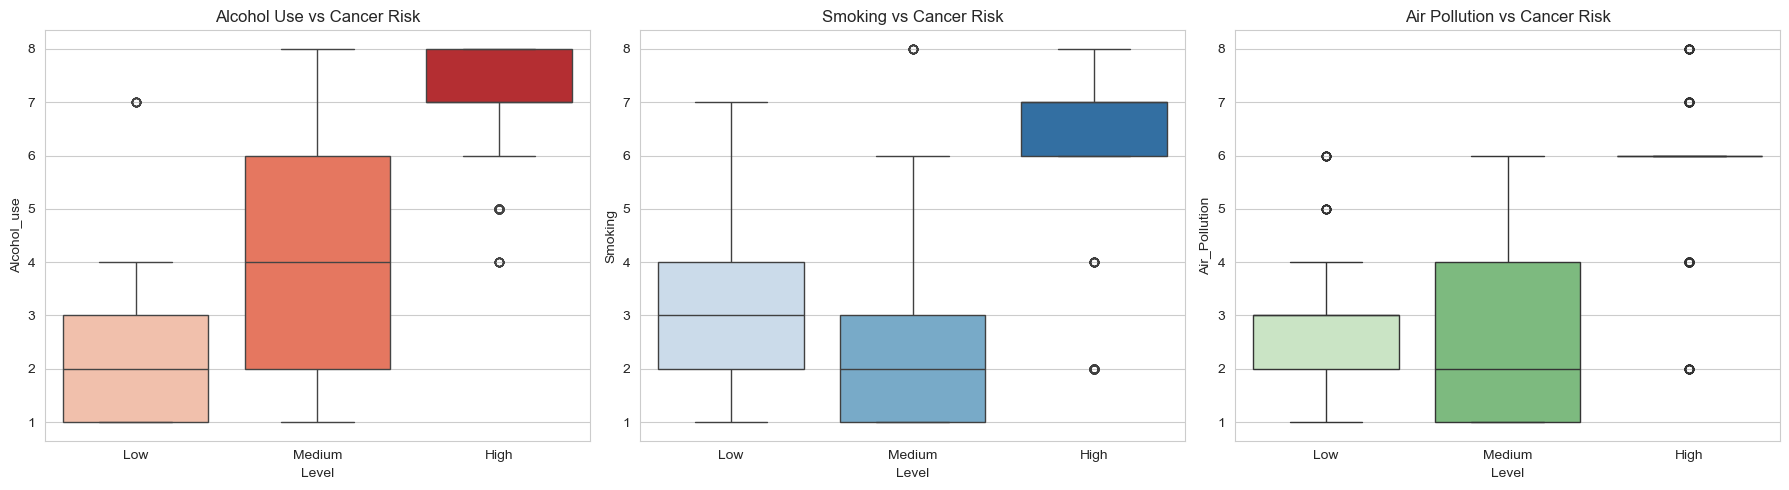

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Alcohol Use vs Level
sns.boxplot(x='Level', y='Alcohol_use', data=df, order=['Low', 'Medium', 'High'], palette='Reds', ax=axes[0])
axes[0].set_title('Alcohol Use vs Cancer Risk')

# Smoking vs Level
sns.boxplot(x='Level', y='Smoking', data=df, order=['Low', 'Medium', 'High'], palette='Blues', ax=axes[1])
axes[1].set_title('Smoking vs Cancer Risk')

# Air Pollution vs Level
sns.boxplot(x='Level', y='Air_Pollution', data=df, order=['Low', 'Medium', 'High'], palette='Greens', ax=axes[2])
axes[2].set_title('Air Pollution vs Cancer Risk')

plt.tight_layout()
plt.show()


**Observation:**
> *   **Alcohol Use:** There is a distinct separation. Patients with **High** cancer risk have a median alcohol use score of ~8, whereas **Low** risk patients have a median of ~2. This suggests alcohol is a strong discriminator.
> *   **Smoking:** A similar trend exists (higher smoking = higher risk), but there is more overlap between the "Medium" and "High" risk categories compared to alcohol.
> *   **Air Pollution:** Showcases a clear step-wise increase. Higher pollution exposure directly correlates with moving from Low to Medium to High risk.


### **6.3 Age vs Risk Level**
Does the risk increase with age?



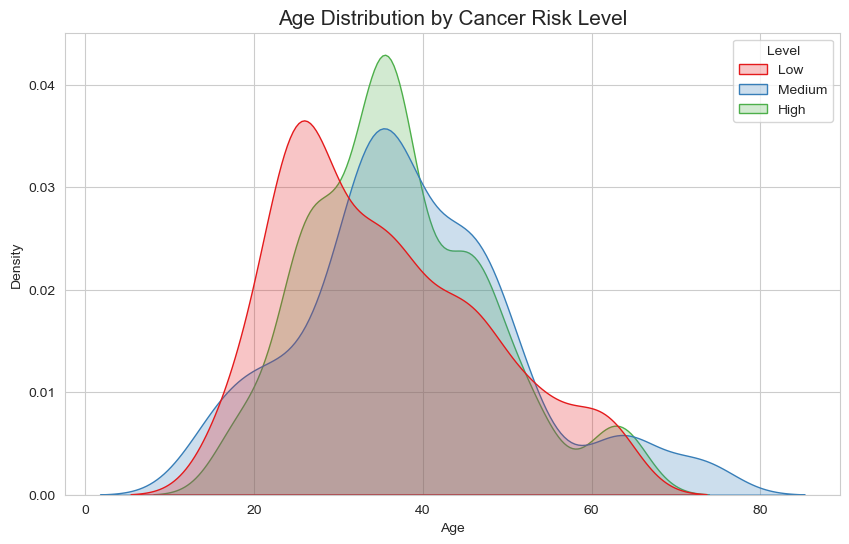

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='Age',
    hue='Level',
    fill=True,
    palette='Set1',
    common_norm=False
)
plt.title('Age Distribution by Cancer Risk Level', fontsize=15)
plt.show()


 
### **6.4 Pairplot for Highest Correlated Features**
Let's pick the top 3 features correlated with the Target and visualize their interactions.


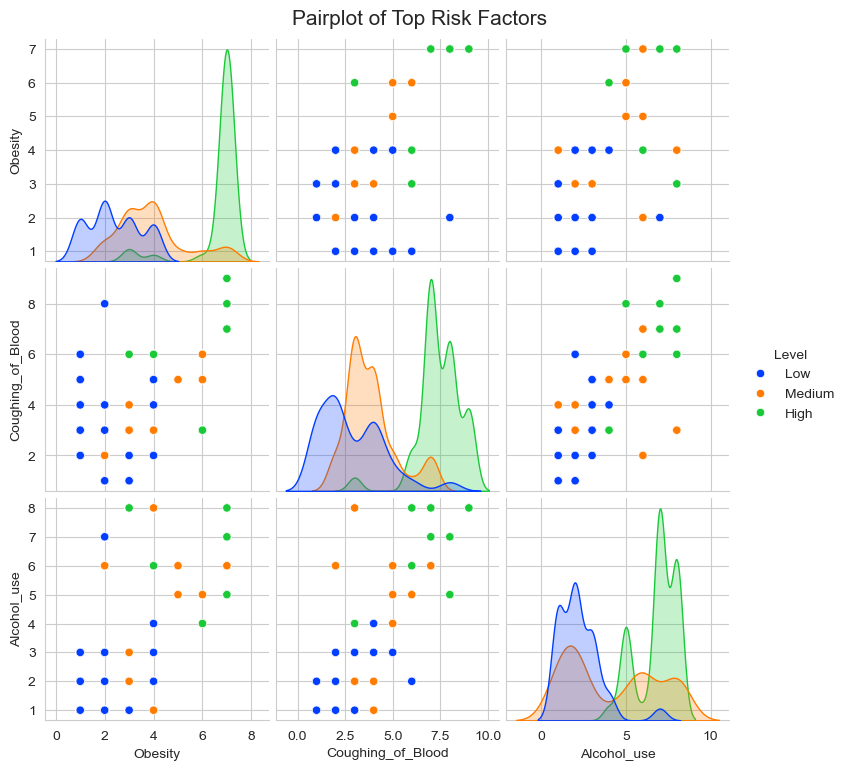

In [ ]:
# Selecting top features based on correlation (Example: Obesity, Coughing of Blood, Alcohol Use)
selected_cols = ['Obesity', 'Coughing_of_Blood', 'Alcohol_use', 'Level']

sns.pairplot(df[selected_cols], hue='Level', hue_order=['Low', 'Medium', 'High'], palette='bright')
plt.suptitle('Pairplot of Top Risk Factors', y=1.02, fontsize=15)
plt.show()


## **7. Conclusion**

### **Summary of Findings**
1.  **Data Quality:** The dataset is clean with no missing values (based on `info()`). The features are mostly ordinal (ranked 1-8 or 1-9).
2.  **Target Distribution:** The `Level` column (Target) shows the distribution of Low, Medium, and High risk cases. (You can note here if it is balanced or imbalanced).
3.  **Correlations:**
    *   The Heatmap reveals strong positive correlations between `Obesity`, `Coughing of Blood`, `Alcohol Use` and the Target `Level`.
    *   `Smoking` and `Passive Smoker` also show significant correlation.
4.  **Assumptions Check:** The assumption that "Air Pollution" increases risk is supported by the data, as seen in the boxplots where "High" risk patients generally have higher exposure scores.

### **Next Steps for MLOps**
*   **Feature Engineering:** Since most features are already ordinal, minimal scaling might be needed for tree-based models, but normalization is required for Neural Networks or Logistic Regression.
*   **Model Selection:** Classification models (Random Forest, XGBoost, or SVM) are suitable for predicting the `Level`.
*   **Pipeline:** This EDA code should be version-controlled and the data validation steps (checking for nulls) should be automated in the pipeline.


In [18]:
df.head()

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,Occupational_Hazards,Genetic_Risk,Chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [19]:
df.to_csv("Dataset/Lung_Patient_Cleaned.csv")